In [2]:
import pandas as pd

from datasets import load_dataset

import matplotlib.pyplot as plt

dataset  = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df.loc[:  , 'salary_rate' : 'salary_hour_avg']


,salary_rate,salary_year_avg,salary_hour_avg
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN
...,...,...,...
785736,None,NaN,NaN
785737,None,NaN,NaN
785738,None,NaN,NaN
785739,None,NaN,NaN


In [5]:
median_salary_year = df['salary_year_avg'].median()

In [6]:
median_salary_hour = df['salary_hour_avg'].median()


In [7]:
df_filled = df

df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)

In [8]:
df_unique = df_filled

df_unique = df_unique.drop_duplicates()

In [9]:
df_unique   = df_unique.drop_duplicates(subset = ['job_title' , 'company_name'])


In [10]:
df_job_country_salary = df.pivot_table(values='salary_year_avg' , index = 'job_title_short' , columns = 'job_country' , aggfunc = 'median' )
df_job_country_salary

job_country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Cloud Engineer,NaN,115000.0,115000.0,NaN,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,115000.0
Data Analyst,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Data Engineer,NaN,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,208114.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Data Scientist,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,115000.0
Machine Learning Engineer,NaN,115000.0,115000.0,NaN,115000.0,115000.0,115000.0,115000.0,115000.0,211000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,115000.0
Senior Data Analyst,115000.0,115000.0,NaN,NaN,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,115000.0
Senior Data Engineer,NaN,115000.0,115000.0,NaN,115000.0,115000.0,115000.0,115000.0,115000.0,173500.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,NaN,115000.0
Senior Data Scientist,NaN,115000.0,NaN,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,...,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,115000.0


In [11]:
top_countries = df['job_country'].value_counts().head(6).index
df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind  = 'bar')








KeyError: "None of [Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',\n       'Spain'],\n      dtype='object', name='job_country')] are in the [index]"

In [ ]:
df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,115000.0,NaN,115000.0,NaN,115000.0,NaN,115000.0,NaN,NaN,NaN
Albania,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Algeria,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,NaN,115000.0
Angola,115000.0,NaN,115000.0,115000.0,115000.0,NaN,NaN,NaN,115000.0,115000.0
Argentina,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Vietnam,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Yemen,115000.0,NaN,115000.0,115000.0,NaN,NaN,NaN,NaN,NaN,115000.0


<Axes: xlabel='job_country'>

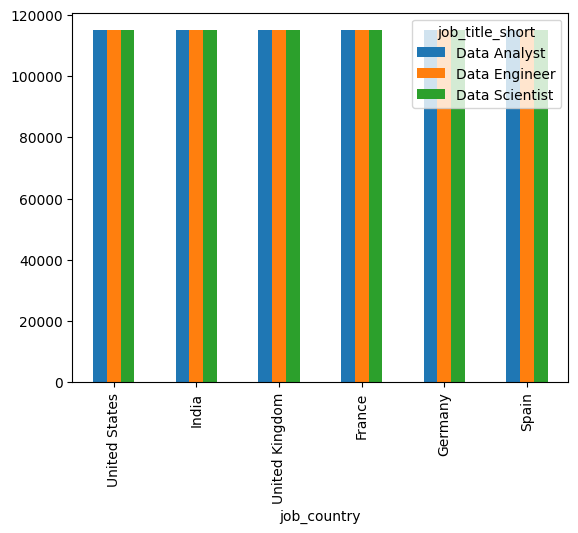

In [ ]:
top_countries = df['job_country'].value_counts().head(6).index

# filter df_job_country_salary for top 6 countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# filter df_job_country_salary for list of 6 job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] # 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']
df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')

In [ ]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [13]:
df_ind = df[df['job_country'] == 'India'].copy()

In [14]:
df_ind['job_posted_month'] = df_ind['job_posted_date'].dt.strftime('%B')
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,115000.0,45.98,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,115000.0,45.98,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,115000.0,45.98,Exusia,None,None,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,115000.0,45.98,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,115000.0,45.98,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,115000.0,45.98,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}",March
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,115000.0,45.98,Amul,None,None,March
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,115000.0,45.98,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}",March
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,115000.0,45.98,Diebold Nixdorf,None,None,March


In [15]:
df_ind_pivot = df_ind.pivot_table(index='job_posted_month' , columns = 'job_title_short' , aggfunc = 'size')

In [16]:
df_ind_pivot.reset_index(inplace=True)
df_ind_pivot['month_no'] = pd.to_datetime(df_ind_pivot['job_posted_month'] , format= '%B').dt.month
df_ind_pivot.sort_values('month_no' , inplace = True)
df_ind_pivot.set_index('job_posted_month')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,1
February,143,35,433,1631,932,42,94,313,165,157,2
March,116,37,422,1591,1005,34,96,351,194,180,3
April,170,32,418,1566,946,54,86,375,194,169,4
May,103,14,278,1384,837,31,59,329,134,98,5
June,146,26,367,1632,1129,41,66,427,238,125,6
July,142,25,457,1528,1123,54,75,359,204,155,7
August,189,25,618,1407,1157,47,126,343,235,148,8
September,155,34,630,1508,984,67,85,324,195,132,9


In [18]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [20]:
months = df['job_posted_month'].unique()


In [21]:
dict_months = {month : df[df['job_posted_month'] == month] for month in months}


In [23]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,115000.0,45.98,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,115000.0,45.98,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,115000.0,45.98,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,115000.0,45.98,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,115000.0,45.98,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,115000.0,45.98,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,115000.0,45.98,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,115000.0,45.98,Cleverlance,None,None,Jan


In [24]:
quarter_1  = [dict_months['Jan'] , dict_months['Feb'] , dict_months['Mar']]
quarter_1

[          job_title_short                                  job_title  \
 1            Data Analyst                               Data Analyst   
 20         Data Scientist                             Data Scientist   
 39          Data Engineer                              Data Engineer   
 53          Data Engineer                              Data Engineer   
 55         Data Scientist                             Data Scientist   
 ...                   ...                                        ...   
 785699  Software Engineer                        Simulation Engineer   
 785700      Data Engineer                       Data Engineer Ssr/Sr   
 785703       Data Analyst    Data Analyst - CRYPTOGRAPHY - Full-time   
 785704   Business Analyst                           Business Analyst   
 785705       Data Analyst  Expert Business Data Analyst - Now Hiring   
 
                                  job_location             job_via  \
 1                Guadalajara, Jalisco, Mexico    vi

In [25]:
df_q1 = pd.concat(quarter_1 , ignore_index=True)
df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,115000.0,45.98,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,115000.0,45.98,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,115000.0,45.98,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,115000.0,45.98,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,115000.0,45.98,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,115000.0,45.98,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,115000.0,45.98,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,115000.0,45.98,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [26]:
df_q1.to_excel('quarter_1.xlsx')

In [28]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [29]:
df_exploded = df.explode('job_skills')


In [ ]:
skills_count = df_exploded.groupby(['job_title_short' , 'job_skills']).size()


job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [33]:
df_skills_count = skills_count.reset_index(name = 'skill_count')


In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [35]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [36]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [37]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [38]:
df_DA_pivot = df_DA_explode.pivot_table(index  = 'job_posted_month_no' , columns  = 'job_skills' , aggfunc='size')

df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
2,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
3,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
4,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
5,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
6,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
7,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
8,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
9,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [41]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0,3607.0,3830.0,1880.0,1778.0,1251.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,7947.0,5772.0,4751.0,3936.0,3307.0,2576.0,2634.0,1291.0,1235.0,954.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7868.0,5675.0,4741.0,4051.0,3176.0,2650.0,2554.0,1266.0,1203.0,892.0,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,7553.0,5496.0,4557.0,3776.0,3106.0,2399.0,2598.0,1190.0,1177.0,947.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,6617.0,4773.0,4070.0,3245.0,2695.0,2093.0,1940.0,979.0,957.0,851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,7584.0,5724.0,4707.0,3812.0,3275.0,2442.0,2174.0,1173.0,1237.0,987.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7687.0,5513.0,4831.0,3928.0,3350.0,2444.0,2118.0,1096.0,1069.0,996.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8823.0,6482.0,5576.0,4533.0,3859.0,2975.0,2560.0,1332.0,1298.0,1117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6829.0,4886.0,4229.0,3446.0,3118.0,2146.0,1880.0,944.0,945.0,852.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary  = ('salary_year_avg' , 'median'),
    skill_count  = ('job_skills' , 'count')

)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


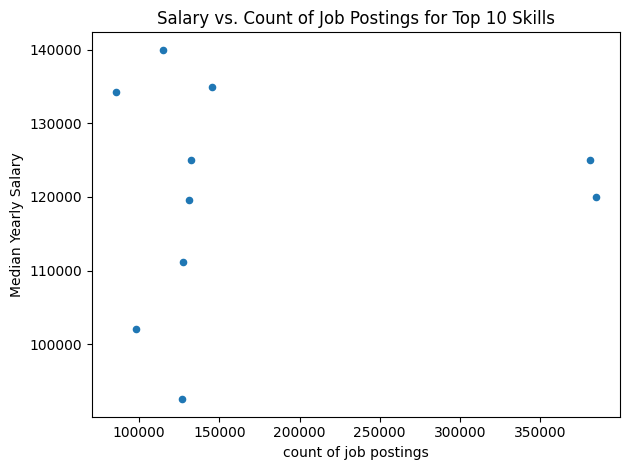

In [5]:
skill_stats.plot(kind = 'scatter', x = 'skill_count' , y = 'median_salary')
plt.xlabel('count of job postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

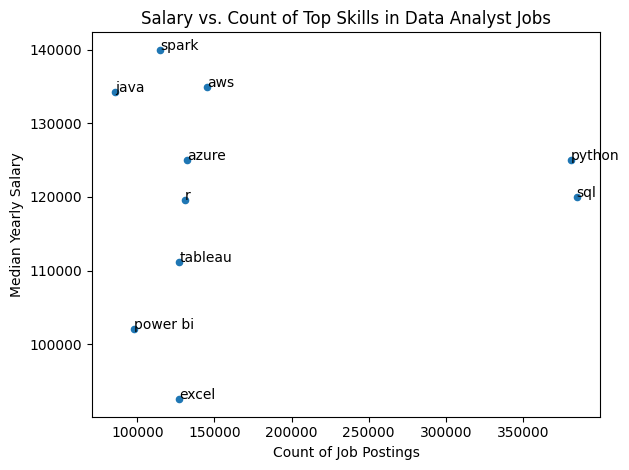

In [8]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i] ,txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()

In [9]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')



In [10]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')